## Работа 1. Исследование гамма-коррекции
автор: Бекетов Р.И. \
дата: 16.02.2022

### Задание
1. Сгенерировать серое тестовое изображение $I_1$ в виде прямоугольника размером 768х60 пикселя с плавным изменение пикселей от черного к белому, одна градация серого занимает 3 пикселя по горизонтали.
2. Применить  к изображению $I_1$ гамма-коррекцию с коэффициентом из интервала 2.2-2.4 и получить изображение $G_1$ при помощи функци pow.
3. Применить  к изображению $I_1$ гамма-коррекцию с коэффициентом из интервала 2.2-2.4 и получить изображение $G_2$ при помощи прямого обращения к пикселям.
4. Показать визуализацию результатов в виде одного изображения (сверху вниз $I_1$, $G_1$, $G_2$).
5. Сделать замер времени обработки изображений в п.2 и п.3, результаты отфиксировать в отчете.

### Результаты
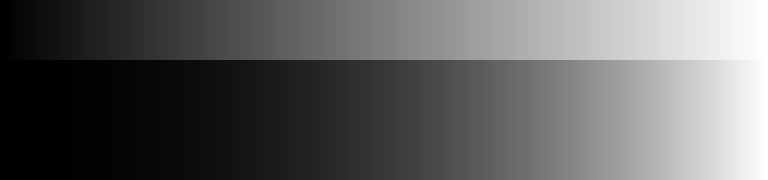
Рис. 1. Результаты работы программы (сверху вниз $I_1$, $G_1$, $G_2$)

### Текст программы

In [1]:
import timeit
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.ones(dtype=np.float32, shape=(60, 768))
b = np.linspace(0.0, 1.0, 256)
for i,j in enumerate(b):
    a[:, i*3: i*3+3] *= j

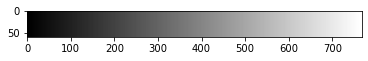

In [3]:
plt.imshow(a, cmap='gray')
plt.show()

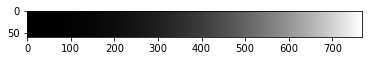

In [4]:
a_pow = cv.pow(a, 2.2)
plt.imshow(a_pow, cmap='gray')
plt.show()

In [5]:
a_ = np.array(a)

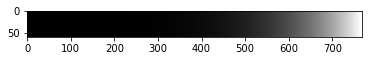

In [20]:
for i in range(a_.shape[0]):
    for j in range(a_.shape[1]):
        a_[i, j] = a_[i, j]**2.2

plt.imshow(a_, cmap='gray')
plt.show()

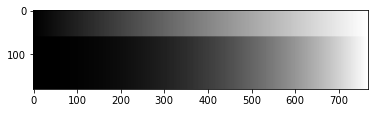

True

In [19]:
stack = np.concatenate((a, a_pow, a_), axis=0)
plt.imshow(stack, cmap='gray')
plt.show()
cv.imwrite('./data/stack.png', stack*255)

In [21]:
code_1 = """
import numpy as np
import cv2 as cv

a = np.ones(dtype=np.float32, shape=(60, 768))
b = np.linspace(0.0, 1.0, 256)
for i,j in enumerate(b):
    a[:, i*3: i*3+3] *= j

a_pow = cv.pow(a, 2.2)
"""

code_2 = """
import numpy as np
import cv2 as cv

a = np.ones(dtype=np.float32, shape=(60, 768))
b = np.linspace(0.0, 1.0, 256)
for i,j in enumerate(b):
    a[:, i*3: i*3+3] *= j

for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        a[i, j] = a[i, j]**2.2
"""

time_1 = timeit.timeit(code_1, number=100)/100
time_2 = timeit.timeit(code_2, number=100)/100
print(time_1, time_2)

0.002425923999999213 0.09655357199999344
